In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image 

In [9]:
#Đọc dữ liệu
data = pd.read_csv('A_Z Handwritten Data.csv')
data = data.astype('float32')

In [10]:
#Hiển thị 5 hàng dữ liệu đầu để kiểm tra
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Tách dữ liệu và nhãn
X = data.drop('0', axis=1).values
y = data['0'].values

In [12]:
#Chuẩn hóa dữ liệu
X /= 255.0

In [13]:
#Chuyển đổi nhãn từ dạng số nguyên sang dạng one-hot encoding.
y = to_categorical(y, num_classes=26)

In [14]:
#Định hình lại dữ liệu đầu vào thành kích thước (số lượng mẫu, 28, 28, 1).
X = X.reshape(-1, 28, 28, 1)

In [15]:
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Kiểm tra kích thước dữ liệu
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (297960, 28, 28, 1)
Test data shape: (74490, 28, 28, 1)


In [17]:

def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    
    # Convolutional Layer 1: trích chọn đặc trưng từ hình ảnh
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Convolutional Layer 2: trích chọn thêm các đặc trưng phức tạp hơn
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully Connected Layer: sử dụng đặc trưng đã trích chọn để dự đoán
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


In [18]:
input_shape = (28, 28, 1)  # Kích thước ảnh
num_classes = 26  # Số lượng lớp (chữ cái từ A-Z)

# Xây dựng mô hình CNN
cnn_model = build_cnn_model(input_shape, num_classes)

# In cấu trúc mô hình
cnn_model.summary()
cnn_model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

D:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 370s 73ms/step - accuracy: 0.8314 - loss: 0.5898 - val_accuracy: 0.9774 - val_loss: 0.0803
Epoch 2/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 289s 62ms/step - accuracy: 0.9542 - loss: 0.1615 - val_accuracy: 0.9852 - val_loss: 0.0563
Epoch 3/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 310s 67ms/step - accuracy: 0.9646 - loss: 0.1242 - val_accuracy: 0.9859 - val_loss: 0.0514
Epoch 4/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 241s 52ms/step - accuracy: 0.9702 - loss: 0.1074 - val_accuracy: 0.9879 - val_loss: 0.0449
Epoch 5/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 286s 61ms/step - accuracy: 0.9724 - loss: 0.0967 - val_accuracy: 0.9877 - val_loss: 0.0450
Epoch 6/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 237s 51ms/step - accuracy: 0.9745 - loss: 0.0897 - val_accuracy: 0.9884 - val_loss: 0.0414
Epoch 7/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 309s 66ms/step - accuracy: 0.9752 - loss: 0.0871 - val_accuracy: 0.9892 - val_loss: 0.0404
Epoch 8/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 275s 59ms/step - accuracy: 

In [19]:
#Đánh giá mô hình
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9896 - loss: 0.0386
Loss: 0.03789987042546272, Accuracy: 0.9897704124450684


In [26]:
# Load và dự đoán từ một ảnh mới
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Đọc và chuyển đổi sang grayscale
    image = image.resize((28, 28))  # Resize ảnh về kích thước 28x28
    image_array = np.array(image)  # Chuyển ảnh sang mảng numpy
    image_array = image_array / 255.0  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    image_array = np.expand_dims(image_array, axis=0)  # Thêm chiều batch
    image_array = np.expand_dims(image_array, axis=-1)  # Thêm chiều channels (ở đây là 1 kênh)
    return image_array

In [27]:
# Dự đoán ký tự từ một ảnh mới
def predict_character(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions, axis=1)
    predicted_character = chr(predicted_label[0] + ord('A'))  # Chuyển đổi chỉ số về ký tự
    return predicted_character

In [28]:
# Đường dẫn đến ảnh cần dự đoán
image_path = r'C:\Users\NGUYEN THANH HOA\Downloads\z5523449353974_681db3fc4a693ea4bde9e3dc352c3183.jpg'


In [29]:
# Dự đoán ký tự từ ảnh
predicted_character = predict_character(cnn_model, image_path)
print(f'Predicted character: {predicted_character}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Predicted character: T


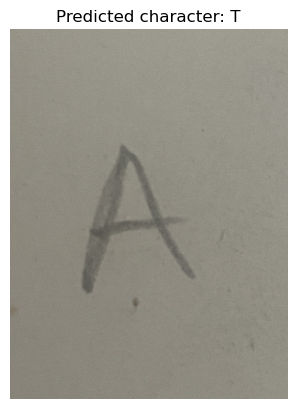

In [25]:
plt.imshow(np.array(Image.open(image_path)))
plt.title(f'Predicted character: {predicted_character}')
plt.axis('off')
plt.show()